In [2]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib as plt

In [3]:
df_Rosario= pd.read_excel('./Rosario F.xlsx')

Debera catacterizar el voto utilizando los datos de la muestra y cualquier otra fuente secundaria que considere. Debera subir el codigo utilizado al repositorio y preprar un informe con los descubrimientos mas relevantes.
1. Porcentaje de voto por edad y por genero
2. Datos de georreferenciación
3. Dos regresiones: 1 con edad y 1 con genero.
4. Cruzar voto por radio. 

In [4]:
df_Rosario.shape


(372, 8)

In [5]:
df_Rosario.dtypes


interview__key            object
METODO                    object
Coord1__Latitude         float64
Coord1__Longitude        float64
EDAD                      object
GENERO                    object
INT DE VOTO X ESPACIO     object
RADIO                      int64
dtype: object

In [6]:
df_Rosario.head

<bound method NDFrame.head of     interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
..             ...    ...               ...                ...       ...   
367   347615540259    IVR        -32.941000         -60.688295  56 y mas   
368   347615540658    IVR        -32.970114         -60.653051   16 a 25   
369   347615672682    IVR        -32.907759         -60.752721  56 y mas   
370   348715470373    IVR        -32.942161         -60.639935  56 y mas   
371   387154502466    IVR        -32.957100         -60.637709  56 y mas   

        GENERO INT DE VOTO X ESPACIO      RADIO  
0    Ma

In [7]:
df_Rosario['INT DE VOTO X ESPACIO'] = df_Rosario['INT DE VOTO X ESPACIO'].astype(str)


frecuencias = df_Rosario['INT DE VOTO X ESPACIO'].value_counts()


porcentajes = (frecuencias / frecuencias.sum()) * 100


resultados = pd.DataFrame({
    'Categoría': frecuencias.index,
    'Frecuencia': frecuencias.values,
    'Porcentaje': porcentajes.values
})


print(resultados)


        Categoría  Frecuencia  Porcentaje
0             JxC          90   24.193548
1             FdT          80   21.505376
2  NINGUNO/NOSABE          72   19.354839
3     LIBERTARIOS          57   15.322581
4           OTROS          35    9.408602
5             PNK          26    6.989247
6             FIT          12    3.225806


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

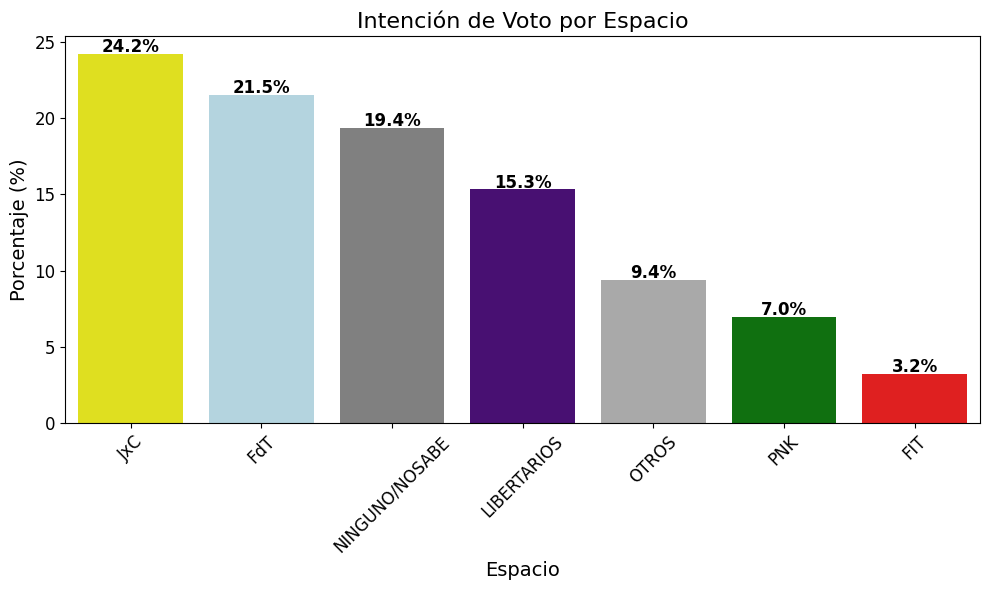

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}


resultados['Color'] = resultados['Categoría'].map(colores)


plt.figure(figsize=(10, 6))

ax = sns.barplot(data=resultados, x='Categoría', y='Porcentaje', 
                 hue='Categoría', palette=colores)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', 
                xytext=(0, 5), textcoords='offset points')  


plt.title('Intención de Voto por Espacio', fontsize=16)
plt.xlabel('Espacio', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

In [9]:

tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['EDAD'])


tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100


df_EDAD_VOTO = tabla_cruzada_porcentaje_columna.copy()


print(df_EDAD_VOTO)



EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [10]:
df_EDAD_VOTO.dtypes


EDAD
16 a 25     float64
26 a 35     float64
36 a 45     float64
46 a 55     float64
56 y mas    float64
dtype: object

In [11]:
print(df_EDAD_VOTO.columns)


Index(['16 a 25', '26 a 35', '36 a 45', '46 a 55', '56 y mas'], dtype='object', name='EDAD')


In [12]:
print(df_EDAD_VOTO)

EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [13]:
df_EDAD_VOTO.reset_index(inplace=True)

In [14]:

df_larga = df_EDAD_VOTO.melt(id_vars='INT DE VOTO X ESPACIO', 
                                 var_name='EDAD', 
                                 value_name='Porcentaje')


print(df_larga.head())

  INT DE VOTO X ESPACIO     EDAD  Porcentaje
0                   FIT  16 a 25    3.571429
1                   FdT  16 a 25   25.000000
2                   JxC  16 a 25   25.000000
3           LIBERTARIOS  16 a 25   25.000000
4        NINGUNO/NOSABE  16 a 25   21.428571


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

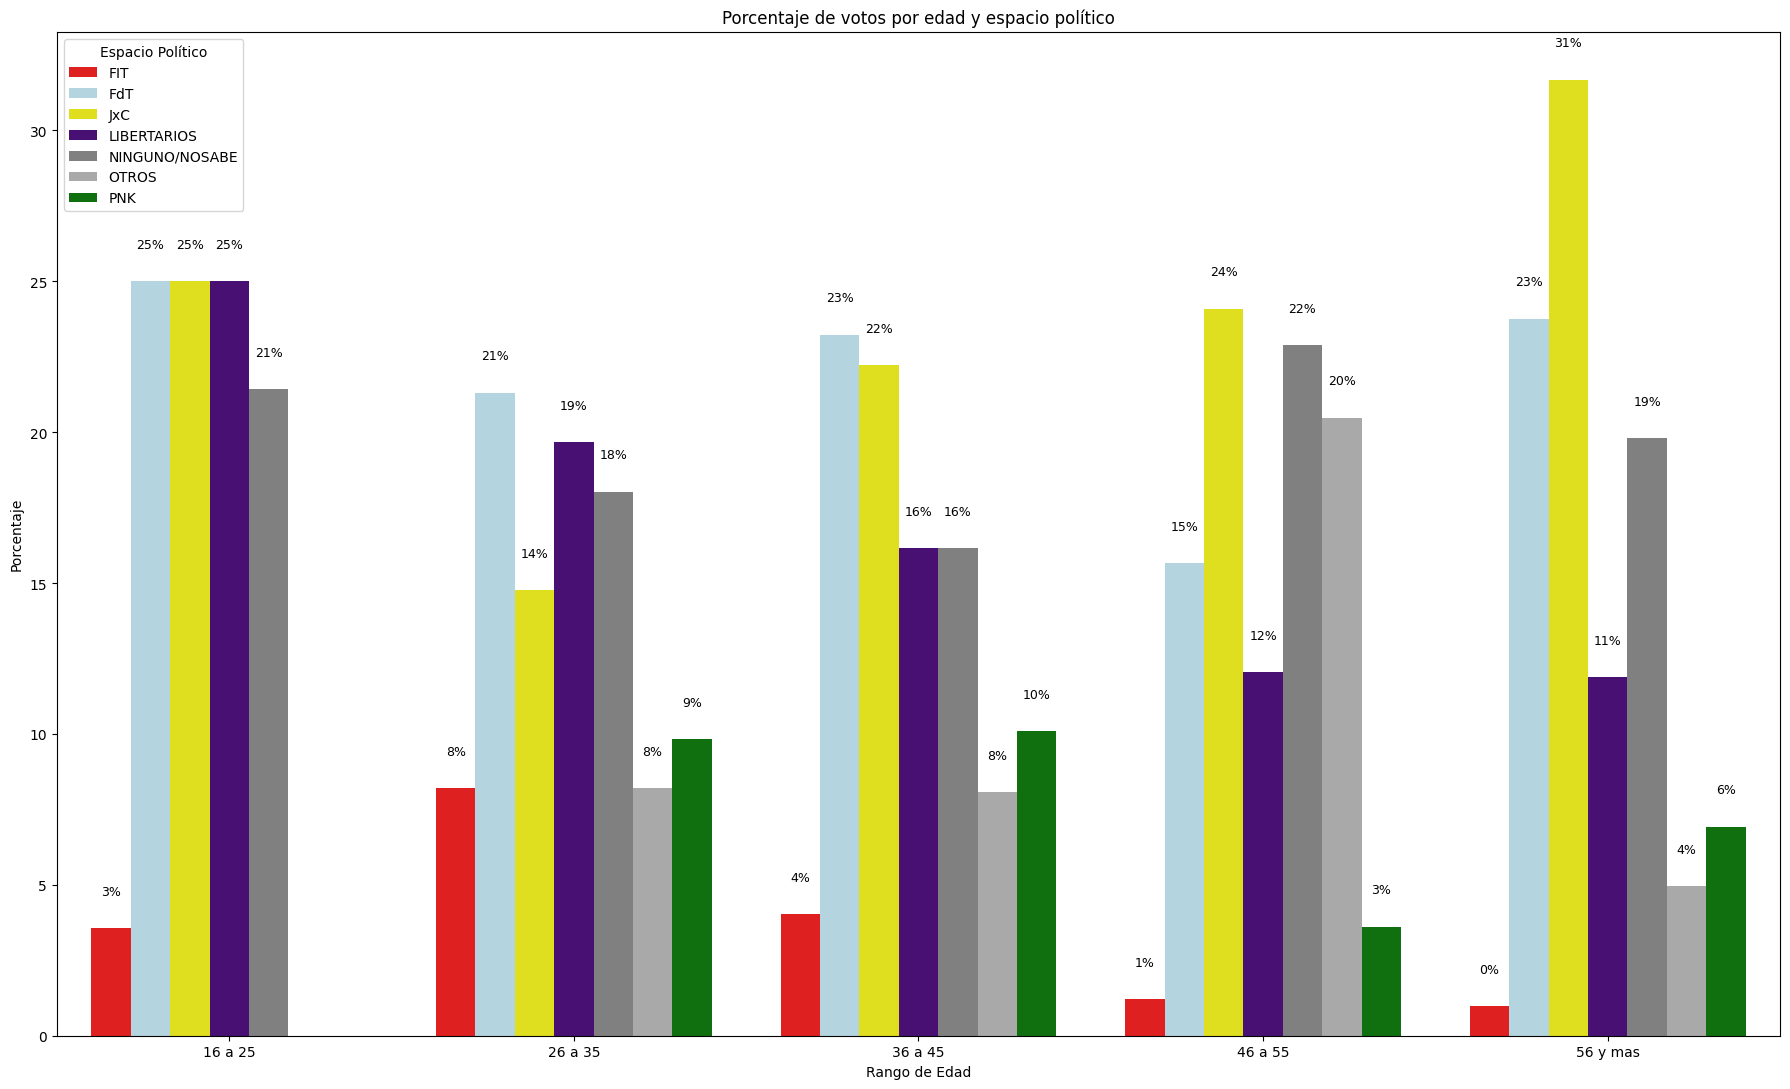

In [15]:

colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}


plt.figure(figsize=(18, 11))


sns.barplot(data=df_larga, x='EDAD', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, errorbar=None)


for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)



plt.title('Porcentaje de votos por edad y espacio político')
plt.xlabel('Rango de Edad')
plt.ylabel('Porcentaje')
plt.legend(title='Espacio Político', loc='upper left')


plt.tight_layout()
plt.show()

In [16]:

tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['GENERO'])


tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100


df_porcentajes2 = tabla_cruzada_porcentaje_columna.copy()


print(df_porcentajes2)



GENERO                  Femenino  Masculino       Otro
INT DE VOTO X ESPACIO                                 
FIT                     3.030303   2.525253  22.222222
FdT                    21.212121  22.727273   0.000000
JxC                    25.454545  24.242424   0.000000
LIBERTARIOS             6.666667  22.222222  22.222222
NINGUNO/NOSABE         24.242424  14.141414  44.444444
OTROS                  11.515152   7.575758  11.111111
PNK                     7.878788   6.565657   0.000000


In [17]:
df_porcentajes2.reset_index(inplace=True)


df_larga2 = df_porcentajes2.melt(id_vars='INT DE VOTO X ESPACIO', 
                                 var_name='GENERO', 
                                 value_name='Porcentaje')


print(df_larga2.head())


  INT DE VOTO X ESPACIO    GENERO  Porcentaje
0                   FIT  Femenino    3.030303
1                   FdT  Femenino   21.212121
2                   JxC  Femenino   25.454545
3           LIBERTARIOS  Femenino    6.666667
4        NINGUNO/NOSABE  Femenino   24.242424


In [18]:
print(df_porcentajes2.columns)


Index(['INT DE VOTO X ESPACIO', 'Femenino', 'Masculino', 'Otro'], dtype='object', name='GENERO')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

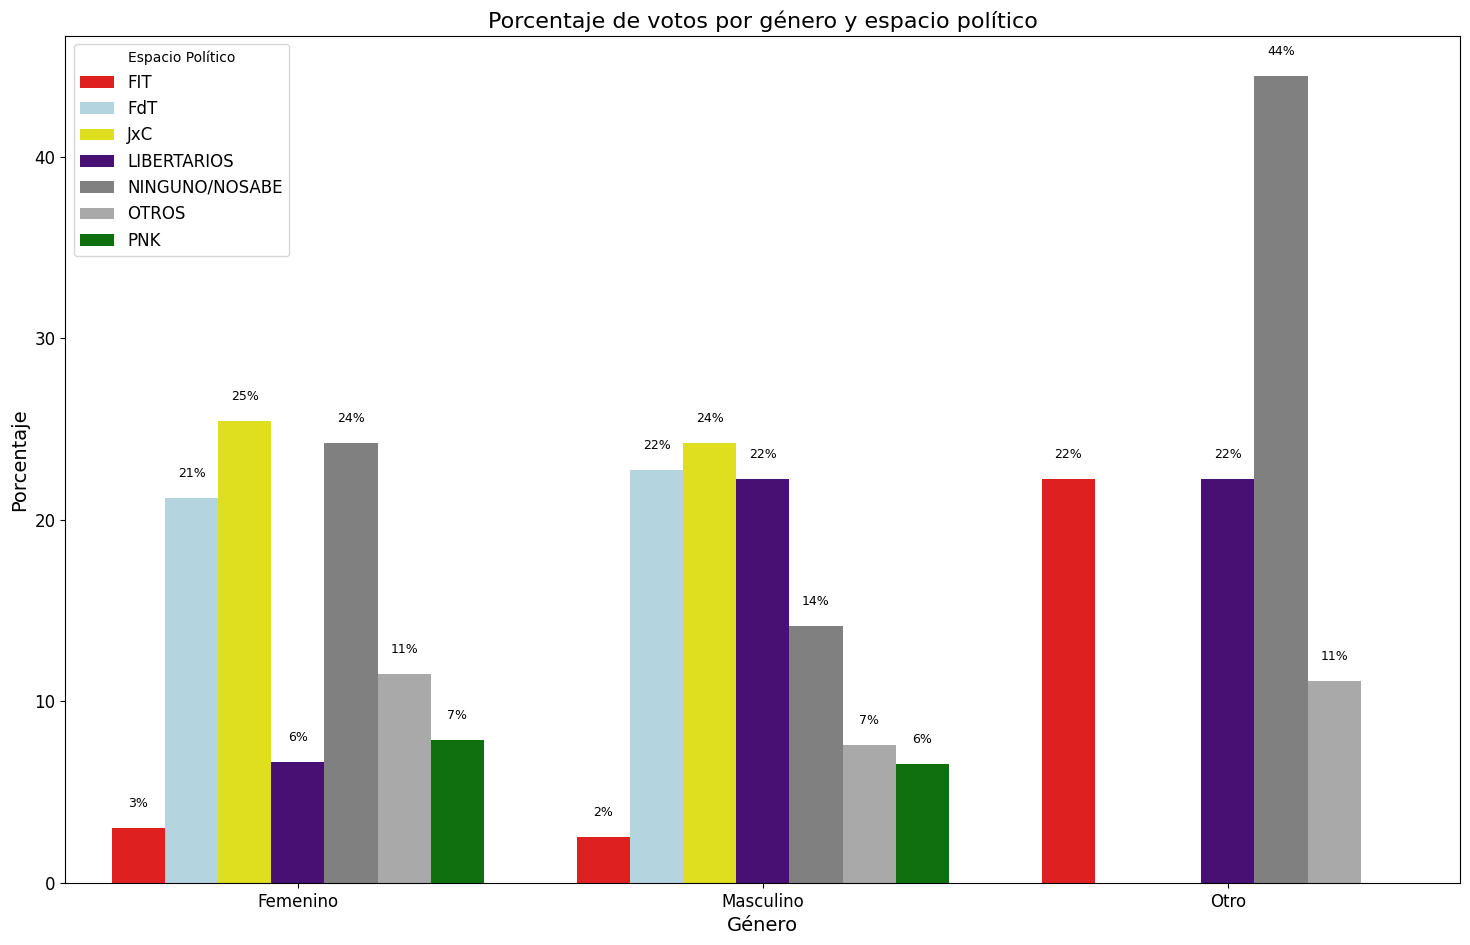

In [19]:
df_larga2 = df_larga2[['GENERO', 'INT DE VOTO X ESPACIO', 'Porcentaje']]


df_larga2.reset_index(drop=True, inplace=True)


plt.figure(figsize=(18, 11))


sns.barplot(data=df_larga2, x='GENERO', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, errorbar=None)


for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)


plt.title('Porcentaje de votos por género y espacio político', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Espacio Político', loc='upper left', fontsize=12)


In [20]:
valores_INTNVOTO = df_Rosario ['INT DE VOTO X ESPACIO'].unique() 
valores_EDAD = df_Rosario ['EDAD'].unique()

print("Valores únicos en INTENCIÓN DE VOTO:", valores_INTNVOTO) 
print("Valores únicos en EDAD:", valores_EDAD)

Valores únicos en INTENCIÓN DE VOTO: ['LIBERTARIOS' 'OTROS' 'NINGUNO/NOSABE' 'JxC' 'FdT' 'PNK' 'FIT']
Valores únicos en EDAD: ['56 y mas' '36 a 45' '26 a 35' '46 a 55' '16 a 25']


In [21]:
df_Rosario_dummies = pd.get_dummies(
    df_Rosario, 
    columns=['EDAD','GENERO', 'INT DE VOTO X ESPACIO'], 
    drop_first=False  # Incluir todas las categorías
)

columnas_a_eliminar = ['RADIO', 'Coord1__Latitude', 'Coord1__Longitude', 'METODO', 'interview__key']
df_Rosario_final = df_Rosario_dummies.drop(columns=columnas_a_eliminar, axis=1)

df_Rosario_final = df_Rosario_final.astype(int)

print(df_Rosario_final)

     EDAD_16 a 25  EDAD_26 a 35  EDAD_36 a 45  EDAD_46 a 55  EDAD_56 y mas  \
0               0             0             0             0              1   
1               0             0             1             0              0   
2               0             0             0             0              1   
3               0             1             0             0              0   
4               0             0             1             0              0   
..            ...           ...           ...           ...            ...   
367             0             0             0             0              1   
368             1             0             0             0              0   
369             0             0             0             0              1   
370             0             0             0             0              1   
371             0             0             0             0              1   

     GENERO_Femenino  GENERO_Masculino  GENERO_Otro  \
0       

Optimization terminated successfully.
         Current function value: 0.132760
         Iterations 9
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FIT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      367
Method:                                  MLE   Df Model:                            4
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                 0.06839
Time:                               16:41:03   Log-Likelihood:                -49.387
converged:                              True   LL-Null:                       -53.012
Covariance Type:                   nonrobust   LLR p-value:                    0.1232
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.9819   2.06e+07  -1.45e-07

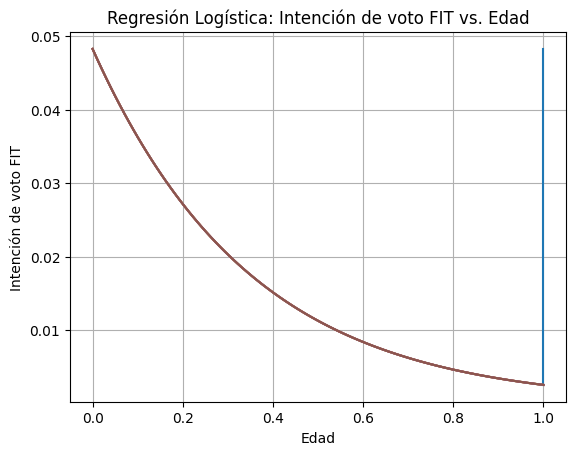

In [22]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_FIT'] 
X = sm.add_constant(X)

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto FIT')
plt.title('Regresión Logística: Intención de voto FIT vs. Edad')
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.517250
         Iterations 6
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FdT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      367
Method:                                  MLE   Df Model:                            4
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                0.006389
Time:                               16:41:03   Log-Likelihood:                -192.42
converged:                              True   LL-Null:                       -193.65
Covariance Type:                   nonrobust   LLR p-value:                    0.6492
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0749   1.56e+07  -6.89e-08

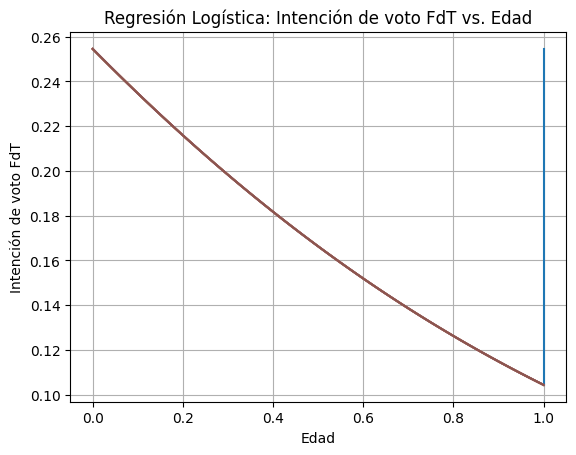

In [23]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_FdT'] 
X = sm.add_constant(X)

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto FdT')
plt.title('Regresión Logística: Intención de voto FdT vs. Edad')
plt.grid(True)
plt.show()

         Current function value: 0.544655
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_JxC   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      367
Method:                                  MLE   Df Model:                            4
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                 0.01562
Time:                               16:41:03   Log-Likelihood:                -202.61
converged:                             False   LL-Null:                       -205.83
Covariance Type:                   nonrobust   LLR p-value:                    0.1691
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0035   5.16e+06  -1.94e-07      1.000   -1.01e+07    1.01e+07


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


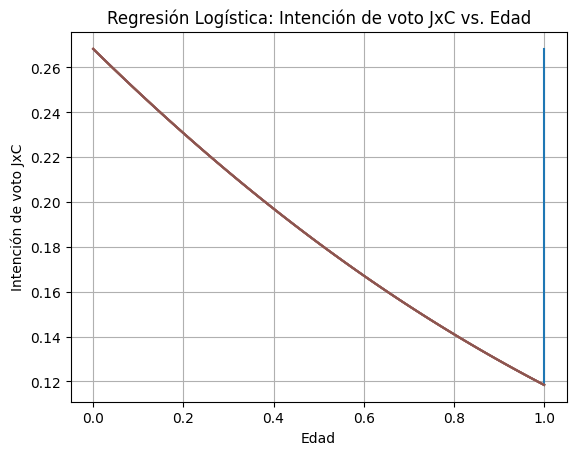

In [24]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_JxC'] 
X = sm.add_constant(X)

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto JxC')
plt.title('Regresión Logística: Intención de voto JxC vs. Edad')
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.422409
         Iterations 6
                                   Logit Regression Results                                  
Dep. Variable:     INT DE VOTO X ESPACIO_LIBERTARIOS   No. Observations:                  372
Model:                                         Logit   Df Residuals:                      367
Method:                                          MLE   Df Model:                            4
Date:                               Tue, 26 Nov 2024   Pseudo R-squ.:                 0.01367
Time:                                       16:41:03   Log-Likelihood:                -157.14
converged:                                      True   LL-Null:                       -159.31
Covariance Type:                           nonrobust   LLR p-value:                    0.3600
                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

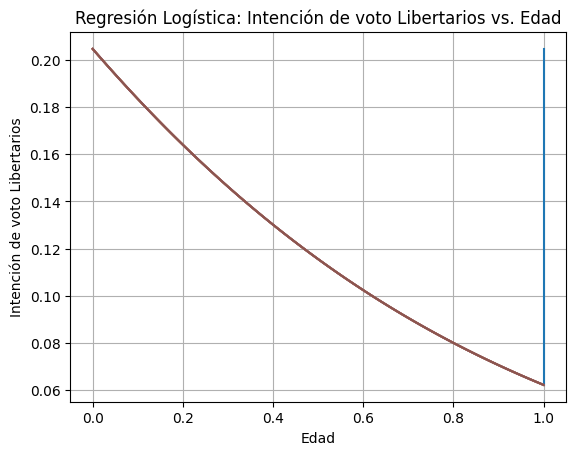

In [25]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_LIBERTARIOS'] 
X = sm.add_constant(X)

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto Libertarios')
plt.title('Regresión Logística: Intención de voto Libertarios vs. Edad')
plt.grid(True)
plt.show()

         Current function value: 0.287833
         Iterations: 35
                                Logit Regression Results                               
Dep. Variable:     INT DE VOTO X ESPACIO_OTROS   No. Observations:                  372
Model:                                   Logit   Df Residuals:                      367
Method:                                    MLE   Df Model:                            4
Date:                         Tue, 26 Nov 2024   Pseudo R-squ.:                 0.07713
Time:                                 16:41:04   Log-Likelihood:                -107.07
converged:                               False   LL-Null:                       -116.02
Covariance Type:                     nonrobust   LLR p-value:                  0.001292
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.6108        nan        nan        nan         

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


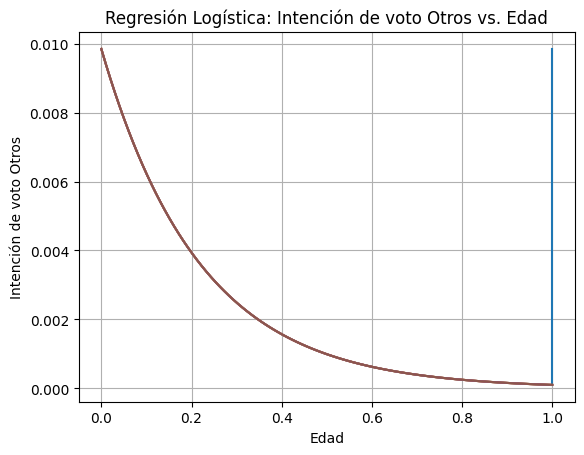

In [26]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_OTROS'] 
X = sm.add_constant(X)


modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto Otros')
plt.title('Regresión Logística: Intención de voto Otros vs. Edad')
plt.grid(True)
plt.show()

         Current function value: 0.489350
         Iterations: 35
                                    Logit Regression Results                                    
Dep. Variable:     INT DE VOTO X ESPACIO_NINGUNO/NOSABE   No. Observations:                  372
Model:                                            Logit   Df Residuals:                      367
Method:                                             MLE   Df Model:                            4
Date:                                  Tue, 26 Nov 2024   Pseudo R-squ.:                0.004024
Time:                                          16:41:04   Log-Likelihood:                -182.04
converged:                                        False   LL-Null:                       -182.77
Covariance Type:                              nonrobust   LLR p-value:                    0.8318
                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


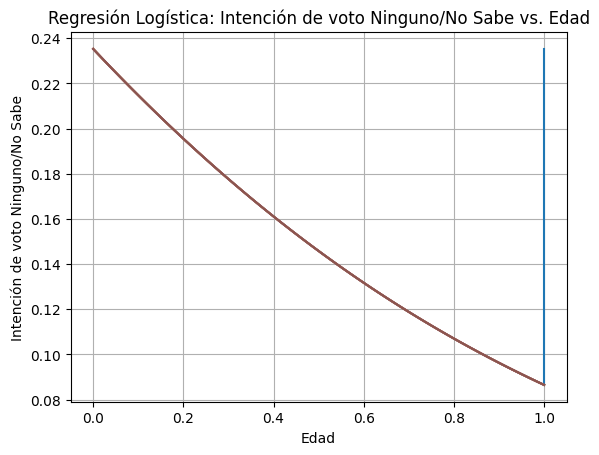

In [27]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_NINGUNO/NOSABE'] 
X = sm.add_constant(X)



modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto Ninguno/No Sabe')
plt.title('Regresión Logística: Intención de voto Ninguno/No Sabe vs. Edad')
plt.grid(True)
plt.show()

REGRESION LOGISTICA INT DE VOTO Y GENERO

In [28]:
import statsmodels.api as sm
import pandas as pd
# GRÁFICO
import matplotlib.pyplot as plt
import seaborn as sns
df_Rosario_final.head()
print(df_Rosario_final.dtypes)

EDAD_16 a 25                            int64
EDAD_26 a 35                            int64
EDAD_36 a 45                            int64
EDAD_46 a 55                            int64
EDAD_56 y mas                           int64
GENERO_Femenino                         int64
GENERO_Masculino                        int64
GENERO_Otro                             int64
INT DE VOTO X ESPACIO_FIT               int64
INT DE VOTO X ESPACIO_FdT               int64
INT DE VOTO X ESPACIO_JxC               int64
INT DE VOTO X ESPACIO_LIBERTARIOS       int64
INT DE VOTO X ESPACIO_NINGUNO/NOSABE    int64
INT DE VOTO X ESPACIO_OTROS             int64
INT DE VOTO X ESPACIO_PNK               int64
dtype: object


In [29]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_FdT']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

         Current function value: 0.514474
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FdT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                 0.01172
Time:                               16:41:04   Log-Likelihood:                -191.38
converged:                             False   LL-Null:                       -193.65
Covariance Type:                   nonrobust   LLR p-value:                    0.1033
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8817        nan        nan        nan         nan    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_JxC']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


         Current function value: 0.546409
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_JxC   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                 0.01246
Time:                               16:41:04   Log-Likelihood:                -203.26
converged:                             False   LL-Null:                       -205.83
Covariance Type:                   nonrobust   LLR p-value:                   0.07702
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8013        nan        nan        nan         nan    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_LIBERTARIOS']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.403394
         Iterations: 35
                                   Logit Regression Results                                  
Dep. Variable:     INT DE VOTO X ESPACIO_LIBERTARIOS   No. Observations:                  372
Model:                                         Logit   Df Residuals:                      369
Method:                                          MLE   Df Model:                            2
Date:                               Tue, 26 Nov 2024   Pseudo R-squ.:                 0.05807
Time:                                       16:41:04   Log-Likelihood:                -150.06
converged:                                     False   LL-Null:                       -159.31
Covariance Type:                           nonrobust   LLR p-value:                 9.596e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_NINGUNO/NOSABE']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.479190
         Iterations 7
                                    Logit Regression Results                                    
Dep. Variable:     INT DE VOTO X ESPACIO_NINGUNO/NOSABE   No. Observations:                  372
Model:                                            Logit   Df Residuals:                      369
Method:                                             MLE   Df Model:                            2
Date:                                  Tue, 26 Nov 2024   Pseudo R-squ.:                 0.02470
Time:                                          16:41:04   Log-Likelihood:                -178.26
converged:                                         True   LL-Null:                       -182.77
Covariance Type:                              nonrobust   LLR p-value:                   0.01094
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

In [33]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_OTROS']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.309650
         Iterations 8
                                Logit Regression Results                               
Dep. Variable:     INT DE VOTO X ESPACIO_OTROS   No. Observations:                  372
Model:                                   Logit   Df Residuals:                      369
Method:                                    MLE   Df Model:                            2
Date:                         Tue, 26 Nov 2024   Pseudo R-squ.:                0.007185
Time:                                 16:41:04   Log-Likelihood:                -115.19
converged:                                True   LL-Null:                       -116.02
Covariance Type:                     nonrobust   LLR p-value:                    0.4345
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.6

In [34]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_FIT']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.135763
         Iterations 8
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FIT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                 0.04732
Time:                               16:41:04   Log-Likelihood:                -50.504
converged:                              True   LL-Null:                       -53.012
Covariance Type:                   nonrobust   LLR p-value:                   0.08140
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.0929        nan  

In [35]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_PNK']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.251273
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_PNK   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                0.008240
Time:                               16:41:04   Log-Likelihood:                -93.474
converged:                             False   LL-Null:                       -94.250
Covariance Type:                   nonrobust   LLR p-value:                    0.4599
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.5263        nan        nan        nan         nan    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
pip install geopandas matplotlib folium

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install shapely geopandas

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import geopandas as gpd

df_Rosario= pd.read_excel('./Rosario F.xlsx')

gdf_Rosario = gpd.GeoDataFrame(
    df_Rosario, 
    geometry=gpd.points_from_xy(df_Rosario['Coord1__Longitude'], df_Rosario['Coord1__Latitude'])
)

gdf_Rosario = gdf_Rosario[['Coord1__Latitude', 'Coord1__Longitude', 'RADIO', 'geometry']]

gdf_Rosario = gdf_Rosario.set_crs(epsg=4326)

gdf_Rosario = gdf_Rosario.to_crs(epsg=4326)

print(gdf_Rosario)
print(gdf_Rosario.crs)

     Coord1__Latitude  Coord1__Longitude      RADIO  \
0          -32.881458         -60.695274  820840409   
1          -32.882259         -60.693571  820840410   
2          -32.884731         -60.692882  820840502   
3          -32.884673         -60.693464  820840502   
4          -32.918833         -60.703628  820841013   
..                ...                ...        ...   
367        -32.941000         -60.688295  821190304   
368        -32.970114         -60.653051  821190305   
369        -32.907759         -60.752721  820843707   
370        -32.942161         -60.639935  820280512   
371        -32.957100         -60.637709  820842113   

                        geometry  
0    POINT (-60.69527 -32.88146)  
1    POINT (-60.69357 -32.88226)  
2    POINT (-60.69288 -32.88473)  
3    POINT (-60.69346 -32.88467)  
4    POINT (-60.70363 -32.91883)  
..                           ...  
367  POINT (-60.68829 -32.94100)  
368  POINT (-60.65305 -32.97011)  
369  POINT (-60.75272 -3

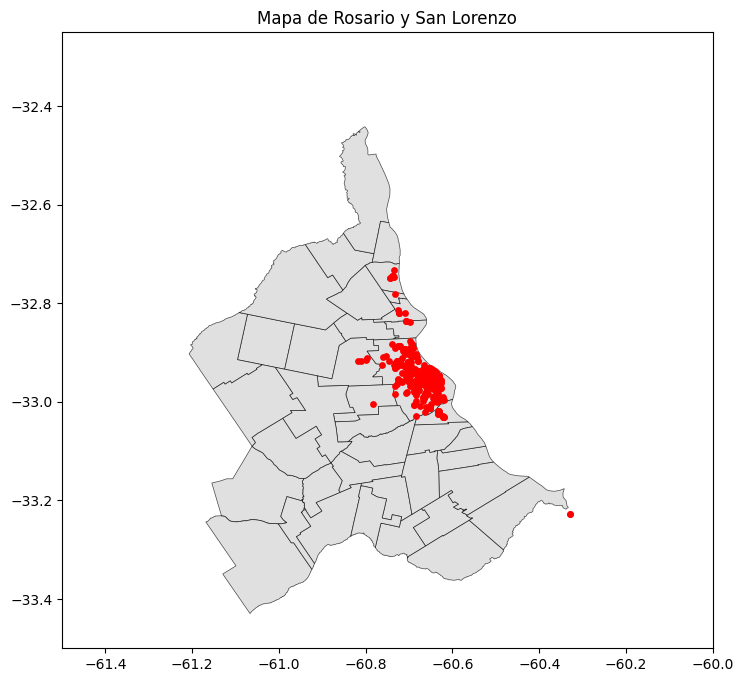

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

mapa_distritos_Rosario = gpd.read_file(r'./Mapas/distritos.geojson')

puntos_rosario = pd.read_excel('./Rosario F.xlsx')

# Crear GeoDataFrame de puntos
gdf_puntos = gpd.GeoDataFrame(
    puntos_rosario, 
    geometry=gpd.points_from_xy(puntos_rosario['Coord1__Longitude'], puntos_rosario['Coord1__Latitude']),
    crs="EPSG:4326"  # Asegura que los puntos estén en el CRS correcto
)

# Filtrar departamentos "Rosario" y "San Lorenzo"
rosario_san_lorenzo = mapa_distritos_Rosario[mapa_distritos_Rosario['nombre_departamento'].isin(['Rosario', 'San Lorenzo'])]

# Verificar si el CRS de los puntos y el mapa coinciden
if gdf_puntos.crs != mapa_distritos_Rosario.crs:
    gdf_puntos = gdf_puntos.to_crs(mapa_distritos_Rosario.crs)

fig, ax = plt.subplots(figsize=(10, 8))

rosario_san_lorenzo.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5, alpha=0.7, zorder=1)

gdf_puntos.plot(ax=ax, color='red', markersize=15, zorder=3)


ax.set_ylim(-33.5, -32.25)
ax.set_xlim(-61.5, -60)

ax.set_title('Mapa de Rosario y San Lorenzo')

plt.show()


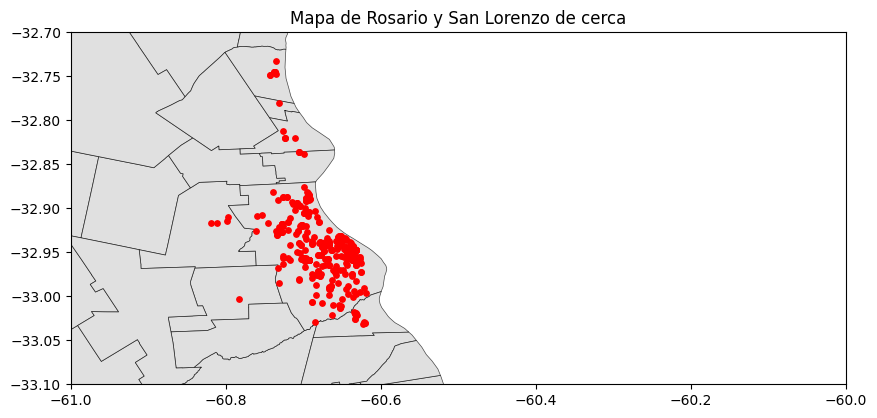

In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

mapa_distritos_Rosario = gpd.read_file(r'./Mapas/distritos.geojson')

puntos_rosario = pd.read_excel('./Rosario F.xlsx')

gdf_puntos = gpd.GeoDataFrame(
    puntos_rosario, 
    geometry=gpd.points_from_xy(puntos_rosario['Coord1__Longitude'], puntos_rosario['Coord1__Latitude']),
    crs="EPSG:4326"  # Asegura que los puntos estén en el CRS correcto
)

rosario_san_lorenzo = mapa_distritos_Rosario[mapa_distritos_Rosario['nombre_departamento'].isin(['Rosario', 'San Lorenzo'])]

if gdf_puntos.crs != mapa_distritos_Rosario.crs:
    gdf_puntos = gdf_puntos.to_crs(mapa_distritos_Rosario.crs)

fig, ax = plt.subplots(figsize=(10, 8))

rosario_san_lorenzo.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5, alpha=0.7, zorder=1)

gdf_puntos.plot(ax=ax, color='red', markersize=15, zorder=3)

ax.set_ylim(-33.1, -32.7)
ax.set_xlim(-61, -60)

ax.set_title('Mapa de Rosario y San Lorenzo de cerca')

plt.show()


/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_45685/727142557.py:37: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Valores nulos en 'RADIO' (puntos_rosario): 0
Valores nulos en 'REDCODE_1' (mapa_radios): 0
Número de registros después del merge: 364


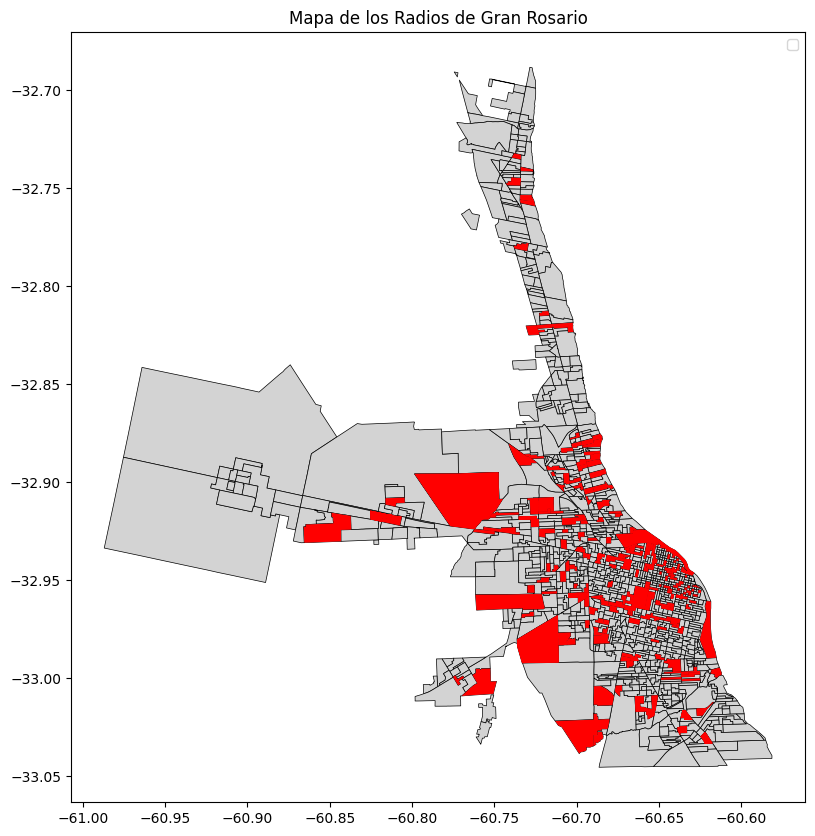

In [41]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

mapa_radios = gpd.read_file('./Mapas/Estratificación de radios censales - Gran Rosario.shp')
puntos_rosario = pd.read_excel('./Rosario F.xlsx')

# Asegurarse de que las columnas 'RADIO' y 'REDCODE_1' sean del mismo tipo
puntos_rosario['RADIO'] = pd.to_numeric(puntos_rosario['RADIO'], errors='coerce')  # Convertir 'RADIO' a numérico
mapa_radios['REDCODE_1'] = pd.to_numeric(mapa_radios['REDCODE_1'], errors='coerce')  # Convertir 'REDCODE_1' a numérico

print("Valores nulos en 'RADIO' (puntos_rosario):", puntos_rosario['RADIO'].isnull().sum())
print("Valores nulos en 'REDCODE_1' (mapa_radios):", mapa_radios['REDCODE_1'].isnull().sum())

# Realizar el merge
gdf_puntos = puntos_rosario.merge(mapa_radios[['REDCODE_1', 'geometry']], left_on='RADIO', right_on='REDCODE_1', how='inner')

# Verificar si el GeoDataFrame tiene datos después del merge
print(f"Número de registros después del merge: {len(gdf_puntos)}")

# Convertir el DataFrame resultante en un GeoDataFrame
gdf_puntos = gpd.GeoDataFrame(gdf_puntos, geometry='geometry', crs=mapa_radios.crs)

if gdf_puntos.crs != mapa_radios.crs:
    gdf_puntos = gdf_puntos.to_crs(mapa_radios.crs)


fig, ax = plt.subplots(figsize=(10, 10))

mapa_radios.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)  # Las líneas de los radios en gris

if not gdf_puntos.empty:
    gdf_puntos.plot(ax=ax, color='red', markersize=10, label='Puntos')  # Los puntos en rojo

ax.set_title('Mapa de los Radios de Gran Rosario')

ax.legend()

plt.show()

gdf_puntos.to_file('./Mapas/puntos_con_radios.geojson', driver='GeoJSON')






   SEGMENTO      color
0         2  darkgreen
1         2  darkgreen
2         4     orange
3         4     orange
4         6      brown


/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_45685/4054011522.py:45: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


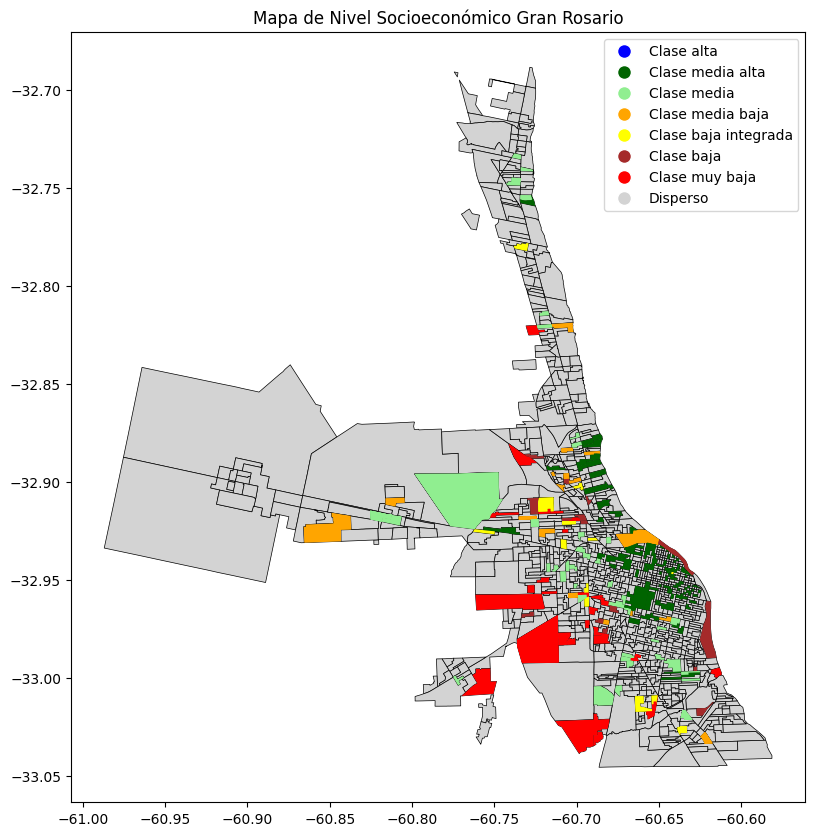

In [42]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

mapa_radios = gpd.read_file('./Mapas/Estratificación de radios censales - Gran Rosario.shp')
puntos_rosario = pd.read_excel('./Rosario F.xlsx')

puntos_rosario['RADIO'] = pd.to_numeric(puntos_rosario['RADIO'], errors='coerce')  # Convertir 'RADIO' a numérico
mapa_radios['REDCODE_1'] = pd.to_numeric(mapa_radios['REDCODE_1'], errors='coerce')  # Convertir 'REDCODE_1' a numérico

# Realizar el merge
gdf_puntos = puntos_rosario.merge(mapa_radios[['REDCODE_1', 'SEGMENTO', 'geometry']], 
                                  left_on='RADIO', 
                                  right_on='REDCODE_1', 
                                  how='inner')

gdf_puntos = gpd.GeoDataFrame(gdf_puntos, geometry='geometry', crs=mapa_radios.crs)

if gdf_puntos.crs != mapa_radios.crs:
    gdf_puntos = gdf_puntos.to_crs(mapa_radios.crs)

color_dict = {
    1: 'blue',  # Clase alta
    2: 'darkgreen',  # Clase media alta
    3: 'lightgreen',  # Clase media
    4: 'orange',  # Clase media baja
    5: 'yellow',  # Clase baja integrada
    6: 'brown',  # Clase baja
    7: 'red',  # Clase muy baja
    99: 'lightgray'  # Disperso
}

gdf_puntos['color'] = gdf_puntos['SEGMENTO'].map(color_dict)

print(gdf_puntos[['SEGMENTO', 'color']].head())

fig, ax = plt.subplots(figsize=(10, 10))

mapa_radios.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)  # Las líneas de los radios

gdf_puntos.plot(ax=ax, color=gdf_puntos['color'], markersize=10, label='Puntos')

handles, labels = ax.get_legend_handles_labels()
legend_labels = {
    1: 'Clase alta',
    2: 'Clase media alta',
    3: 'Clase media',
    4: 'Clase media baja',
    5: 'Clase baja integrada',
    6: 'Clase baja',
    7: 'Clase muy baja',
    99: 'Disperso'
}

custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[k], markersize=10) for k in color_dict]
ax.legend(custom_lines, [legend_labels[k] for k in color_dict])
ax.set_title('Mapa de Nivel Socioeconómico Gran Rosario')

plt.show()

gdf_puntos.to_file('./Mapas/puntos_con_radios_coloreados.geojson', driver='GeoJSON')


   SEGMENTO      color
0         2  darkgreen
1         2  darkgreen
2         4     orange
3         4     orange
4         6      brown


/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_45685/84090709.py:45: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


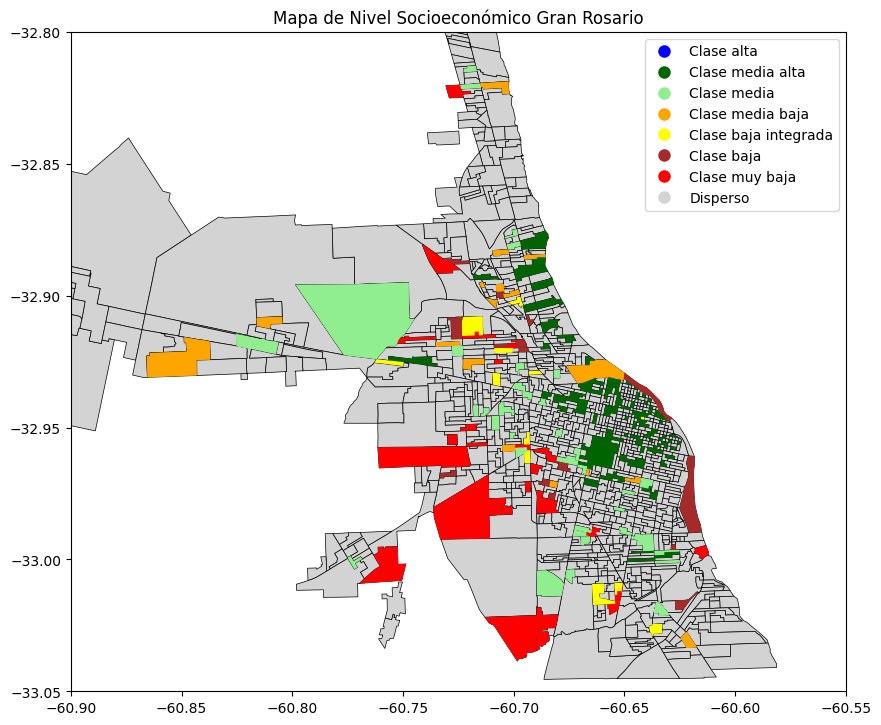

In [49]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

mapa_radios = gpd.read_file('./Mapas/Estratificación de radios censales - Gran Rosario.shp')
puntos_rosario = pd.read_excel('./Rosario F.xlsx')

puntos_rosario['RADIO'] = pd.to_numeric(puntos_rosario['RADIO'], errors='coerce')  # Convertir 'RADIO' a numérico
mapa_radios['REDCODE_1'] = pd.to_numeric(mapa_radios['REDCODE_1'], errors='coerce')  # Convertir 'REDCODE_1' a numérico

# Realizar el merge
gdf_puntos = puntos_rosario.merge(mapa_radios[['REDCODE_1', 'SEGMENTO', 'geometry']], 
                                  left_on='RADIO', 
                                  right_on='REDCODE_1', 
                                  how='inner')

gdf_puntos = gpd.GeoDataFrame(gdf_puntos, geometry='geometry', crs=mapa_radios.crs)

if gdf_puntos.crs != mapa_radios.crs:
    gdf_puntos = gdf_puntos.to_crs(mapa_radios.crs)

color_dict = {
    1: 'blue',  # Clase alta
    2: 'darkgreen',  # Clase media alta
    3: 'lightgreen',  # Clase media
    4: 'orange',  # Clase media baja
    5: 'yellow',  # Clase baja integrada
    6: 'brown',  # Clase baja
    7: 'red',  # Clase muy baja
    99: 'lightgray'  # Disperso
}

gdf_puntos['color'] = gdf_puntos['SEGMENTO'].map(color_dict)

print(gdf_puntos[['SEGMENTO', 'color']].head())

fig, ax = plt.subplots(figsize=(10, 10))

mapa_radios.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)  # Las líneas de los radios

gdf_puntos.plot(ax=ax, color=gdf_puntos['color'], markersize=10, label='Puntos')

handles, labels = ax.get_legend_handles_labels()
legend_labels = {
    1: 'Clase alta',
    2: 'Clase media alta',
    3: 'Clase media',
    4: 'Clase media baja',
    5: 'Clase baja integrada',
    6: 'Clase baja',
    7: 'Clase muy baja',
    99: 'Disperso'
}
ax.set_ylim(-33.05, -32.8)
ax.set_xlim(-60.9, -60.55)
custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[k], markersize=10) for k in color_dict]
ax.legend(custom_lines, [legend_labels[k] for k in color_dict])
ax.set_title('Mapa de Nivel Socioeconómico Gran Rosario')

plt.show()

gdf_puntos.to_file('./Mapas/puntos_con_radios_coloreados.geojson', driver='GeoJSON')

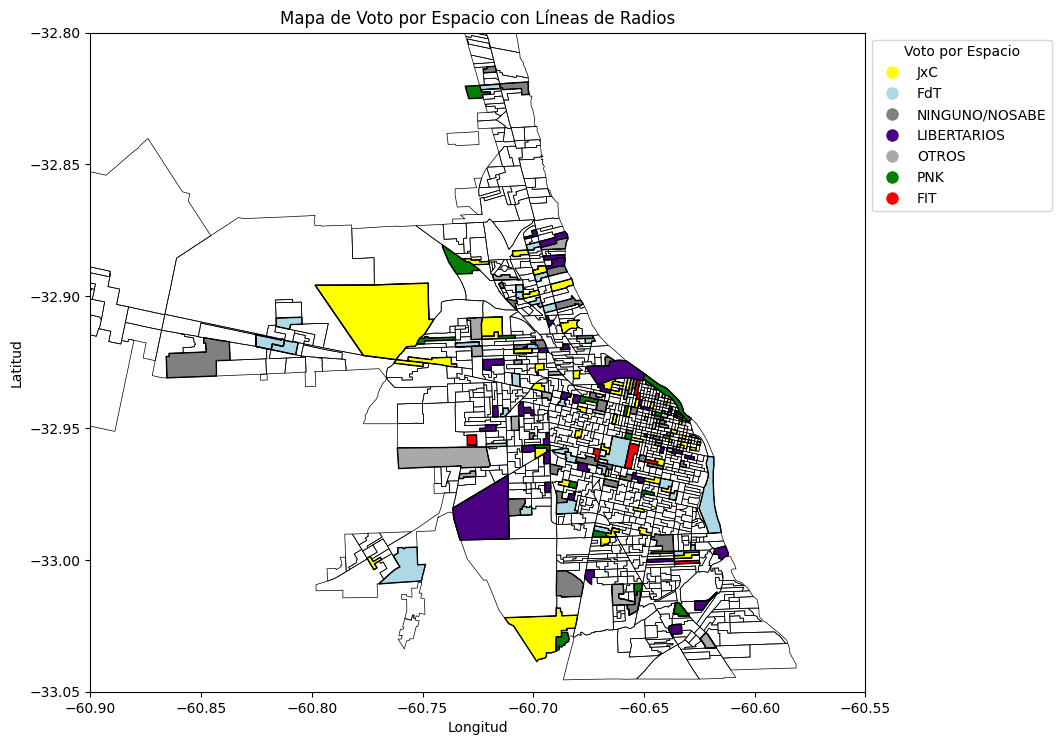

In [50]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}

mapa_radios = gpd.read_file('./Mapas/Estratificación de radios censales - Gran Rosario.shp')
puntos_rosario = pd.read_excel('./Rosario F.xlsx')

puntos_rosario['RADIO'] = pd.to_numeric(puntos_rosario['RADIO'], errors='coerce')  # Convertir 'RADIO' a numérico
mapa_radios['REDCODE_1'] = pd.to_numeric(mapa_radios['REDCODE_1'], errors='coerce')  # Convertir 'REDCODE_1' a numérico

# Realizar el merge
gdf_puntos = puntos_rosario.merge(mapa_radios[['REDCODE_1', 'geometry']], 
                                  left_on='RADIO', 
                                  right_on='REDCODE_1', 
                                  how='inner')

gdf_puntos = gpd.GeoDataFrame(gdf_puntos, geometry='geometry', crs=mapa_radios.crs)

if 'INT DE VOTO X ESPACIO' in gdf_puntos.columns:
    # Crear una nueva columna de color en función de 'INT DE VOTO X ESPACIO'
    gdf_puntos['color'] = gdf_puntos['INT DE VOTO X ESPACIO'].map(colores)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Usar la columna 'color' directamente para el parámetro 'color' en lugar de 'column'
    gdf_puntos.plot(ax=ax, color=gdf_puntos['color'], edgecolor='black')

    # Dibujar el mapa de los radios
    mapa_radios.plot(ax=ax, edgecolor='black', linewidth=0.5, color='none')  # Líneas de los radios
    
    # Crear manualmente la leyenda con las etiquetas correspondientes
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in colores.values()]
    labels = [key for key in colores.keys()]
    
    ax.legend(handles=handles, labels=labels, title='Voto por Espacio', bbox_to_anchor=(1, 1), loc='upper left')
    ax.set_ylim(-33.05, -32.8)
    ax.set_xlim(-60.9, -60.55)
    ax.set_title('Mapa de Voto por Espacio con Líneas de Radios')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    
    # Guardar el mapa como un archivo GeoJSON
    gdf_puntos.to_file('./Mapas/mapa_voto_por_espacio_con_lineas.geojson', driver='GeoJSON')
else:
    print("La columna 'INT DE VOTO X ESPACIO' no se encuentra en el GeoDataFrame.")






No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


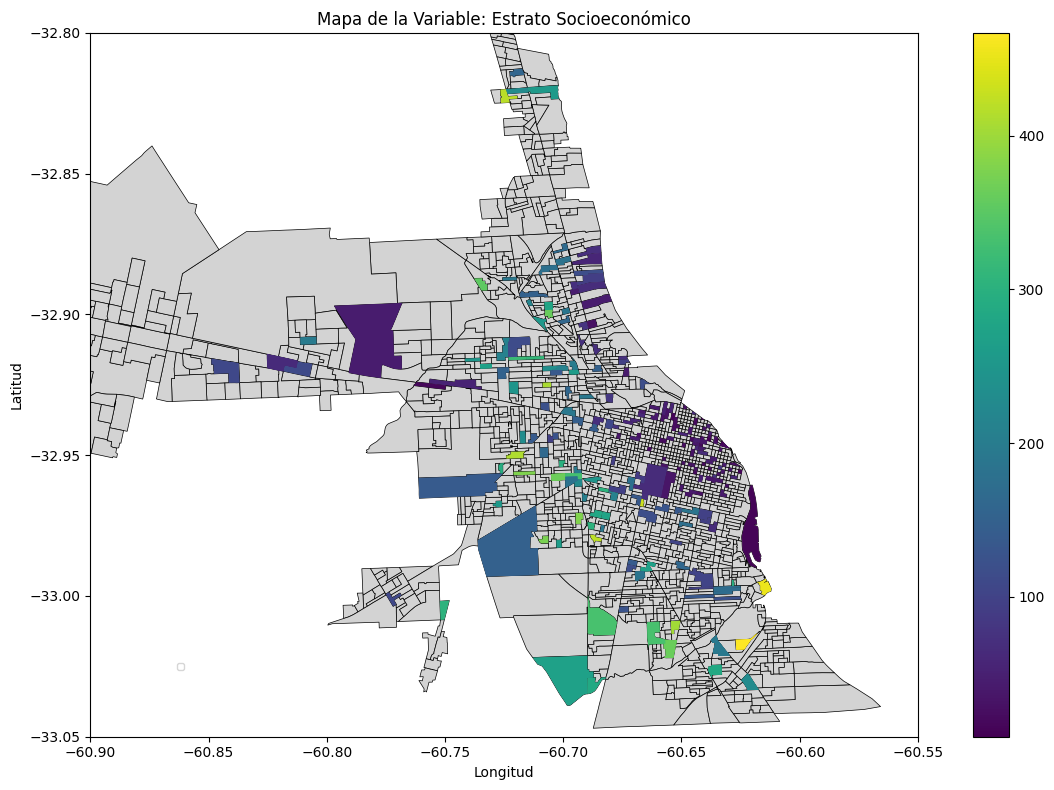

In [44]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

mapa_radios = gpd.read_file('./Mapas/Indicadores de personas. Radios, 2022 - Gran Rosario.shp')
puntos_rosario = pd.read_excel('./Rosario F.xlsx')

puntos_rosario['RADIO'] = pd.to_numeric(puntos_rosario['RADIO'], errors='coerce')  
mapa_radios['REDCODE_1'] = pd.to_numeric(mapa_radios['REDCODE_1'], errors='coerce')

# Realizar el merge
gdf_puntos = puntos_rosario.merge(mapa_radios[['REDCODE_1', 'P18A_SOLOP', 'geometry']], 
                                  left_on='RADIO', 
                                  right_on='REDCODE_1', 
                                  how='inner')

# Convertir el DataFrame resultante en un GeoDataFrame
gdf_puntos = gpd.GeoDataFrame(gdf_puntos, geometry='geometry', crs=mapa_radios.crs)

if gdf_puntos.crs != mapa_radios.crs:
    gdf_puntos = gdf_puntos.to_crs(mapa_radios.crs)


fig, ax = plt.subplots(figsize=(12, 8))

mapa_radios.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)

# Plotear los puntos sobre el mapa con colores según el 'p18a_soloprimaria'
gdf_puntos.plot(ax=ax, column='P18A_SOLOP', cmap='viridis', 
                legend=True)

ax.set_ylim(-33.05, -32.8)
ax.set_xlim(-60.9, -60.55)

ax.set_title('Mapa de la Variable: Estrato Socioeconómico')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.legend(loc='center left', bbox_to_anchor=(0.1, 0.1), fontsize=6)

plt.tight_layout()
plt.show()

gdf_puntos.to_file('./Mapas/puntos_con_radios_coloreados_intensidad.geojson', driver='GeoJSON')
